# Homework 3 Q1

In [279]:
from sklearn import linear_model, model_selection, metrics, neighbors, preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

### Task 1: Load and Clean data
- Load the .csv file using pandas
- Drop No, year, day, hour, season (keep month because of holidays)
- Remove all rows to NA

In [280]:
df = pd.read_csv('BeijingPM20100101_20151231.csv', index_col=0)


In [281]:
df = df.drop(["year", "month", "day", "hour"], axis=1) # Time is a byproduct of polution

df

,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,
1,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
2,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
3,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
4,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
5,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52580,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52581,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52582,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0


In [282]:
df = df.dropna()
df

,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
No,,,,,,,,,,,,,
27825,1,117.0,166.0,140.0,150.0,-6.0,59.0,1019.0,1.0,cv,0.89,0.0,0.0
27826,1,131.0,165.0,152.0,163.0,-8.0,38.0,1019.0,5.0,cv,1.78,0.0,0.0
27827,1,141.0,173.0,128.0,172.0,-8.0,31.0,1018.0,8.0,cv,2.67,0.0,0.0
27829,1,169.0,182.0,3.0,181.0,-9.0,23.0,1017.0,11.0,cv,4.45,0.0,0.0
27830,1,169.0,169.0,3.0,187.0,-9.0,22.0,1015.0,12.0,cv,5.34,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,4,119.0,117.0,112.0,114.0,-10.0,58.0,1030.0,-3.0,SE,6.25,0.0,0.0
52580,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52581,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0


In [283]:
Dongsi = df["PM_Dongsi"]
Dongsihuan = df["PM_Dongsihuan"]
Nongzhanguan = df["PM_Nongzhanguan"]
df = df.rename(columns={"PM_US Post": "PM_USPost"})
USPost = df["PM_USPost"]

In [284]:
PMData = df.drop(["PM_Dongsi", "PM_Dongsihuan", "PM_Nongzhanguan", "PM_USPost"], axis=1)
print(PMData["cbwd"].unique())
ct = make_column_transformer(
(preprocessing.OneHotEncoder(sparse_output=False),
["cbwd"]),
remainder="passthrough")
ct.set_output(transform="pandas")
PMData = ct.fit_transform(PMData)
PMData

['cv' 'SE' 'NE' 'NW']


,onehotencoder__cbwd_NE,onehotencoder__cbwd_NW,onehotencoder__cbwd_SE,onehotencoder__cbwd_cv,remainder__season,remainder__DEWP,remainder__HUMI,remainder__PRES,remainder__TEMP,remainder__Iws,remainder__precipitation,remainder__Iprec
No,,,,,,,,,,,,
27825,0.0,0.0,0.0,1.0,1,-6.0,59.0,1019.0,1.0,0.89,0.0,0.0
27826,0.0,0.0,0.0,1.0,1,-8.0,38.0,1019.0,5.0,1.78,0.0,0.0
27827,0.0,0.0,0.0,1.0,1,-8.0,31.0,1018.0,8.0,2.67,0.0,0.0
27829,0.0,0.0,0.0,1.0,1,-9.0,23.0,1017.0,11.0,4.45,0.0,0.0
27830,0.0,0.0,0.0,1.0,1,-9.0,22.0,1015.0,12.0,5.34,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52579,0.0,0.0,1.0,0.0,4,-10.0,58.0,1030.0,-3.0,6.25,0.0,0.0
52580,0.0,0.0,1.0,0.0,4,-8.0,68.0,1031.0,-3.0,7.14,0.0,0.0
52581,0.0,0.0,1.0,0.0,4,-8.0,63.0,1030.0,-2.0,8.03,0.0,0.0


## Linear Regression

In [285]:
def linearRegression(title, X, Y):
    print(title)
    regr = linear_model.LinearRegression()
    
    scores = model_selection.cross_validate(
        regr, X, Y, cv=5,
        scoring=["neg_root_mean_squared_error", "r2"]
    )

    rmse_scores = -scores["test_neg_root_mean_squared_error"] 
    r2_scores = scores["test_r2"]

    print("Average RMSE:", rmse_scores.mean())
    print("Average R²:", r2_scores.mean())


In [286]:
linearRegression("PM2.5 in Dongsi", PMData, Dongsi)
linearRegression("PM2.5 in Dongsihuan", PMData, Dongsihuan)
linearRegression("PM2.5 in Nongzhanguan", PMData, Nongzhanguan)
linearRegression("PM2.5 in US Post", PMData, USPost)

PM2.5 in Dongsi
Average RMSE: 72.39589319324824
Average R²: 0.20364680165578236
PM2.5 in Dongsihuan
Average RMSE: 74.88662629774338
Average R²: 0.2263331275671871
PM2.5 in Nongzhanguan
Average RMSE: 71.84745705479409
Average R²: 0.20833349042508073
PM2.5 in US Post
Average RMSE: 73.7034902191624
Average R²: 0.21321207988425592


## KNN Regression

In [287]:
def knnRegression(title, X, Y, k):
    print(title)
    knn_regression = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
    
    scores = model_selection.cross_validate(
        knn_regression, X, Y, cv=5,
        scoring=["neg_root_mean_squared_error", "r2"]
    )

    rmse_scores = -scores["test_neg_root_mean_squared_error"]  
    r2_scores = scores["test_r2"]
    
    print("Average RMSE:", rmse_scores.mean())
    print("Average R²:", r2_scores.mean())

In [288]:
# To find the best k
param_grid = {'n_neighbors': range(0, 200)}  # Try k values from 1 to 20
knn = neighbors.KNeighborsRegressor(weights='uniform')

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(PMData, Dongsihuan)

best_k = grid_search.best_params_['n_neighbors']
best_score = -grid_search.best_score_  # Take negative to get positive RMSE
print(f"Best k: {best_k}")
print(f"Best RMSE: {best_score}")

Best k: 117
Best RMSE: 71.74841119303562


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pack

In [289]:
knnRegression("PM2.5 in Dongsi", PMData, Dongsi, best_k)
knnRegression("PM2.5 in Dongsihuan", PMData, Dongsihuan, best_k)
knnRegression("PM2.5 in Nongzhanguan", PMData, Nongzhanguan, best_k)
knnRegression("PM2.5 in US Post", PMData, USPost, best_k)

PM2.5 in Dongsi
Average RMSE: 71.92488336536884
Average R²: 0.21549553570971178
PM2.5 in Dongsihuan
Average RMSE: 71.74841119303562
Average R²: 0.2891617948498425
PM2.5 in Nongzhanguan
Average RMSE: 69.77096772116674
Average R²: 0.2542502676267572
PM2.5 in US Post
Average RMSE: 71.9327127953679
Average R²: 0.25142395086168634


## Homework 3 Q2

In [290]:
df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)
className = df.iloc[:,7]
className -= 1
seedData = df.iloc[:, :-1]

/var/folders/9j/nc78x2y16qd1hdy75n60b0d80000gn/T/ipykernel_89866/480086933.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("seeds_dataset.txt", delim_whitespace=True, header=None)


In [291]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [292]:
kmeans.fit(seedData)

KMeans(n_clusters=3, random_state=42)

In [293]:
import collections
k_labels = kmeans.labels_
print("Clusters (result of k-means)")
print(collections.Counter(k_labels))
print("Ground Truth")
print(collections.Counter(className))

Clusters (result of k-means)
Counter({1: 77, 2: 72, 0: 61})
Ground Truth
Counter({0: 70, 1: 70, 2: 70})


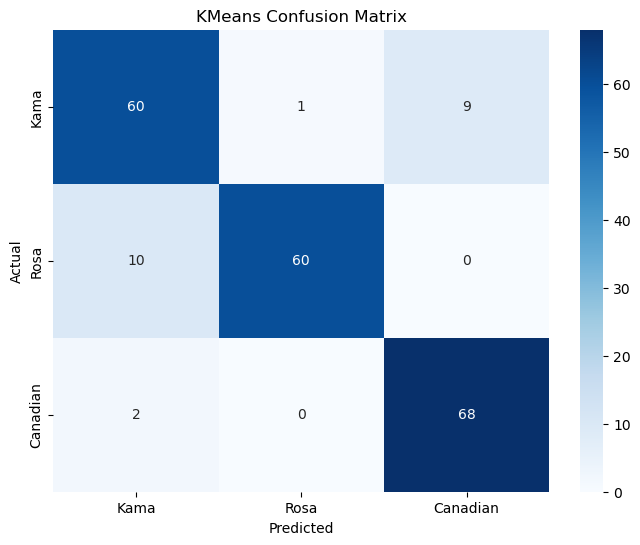

In [294]:
# Get cluster labels
mapped_labels = np.zeros_like(k_labels)

# This function was AI assisted, I didn't see in the tutorials how to map 
# clusters to the class names
for cluster in range(3):
    cluster_indices = np.where(k_labels == cluster)[0]
    true_labels = className.iloc[cluster_indices]
    most_common_class = collections.Counter(true_labels).most_common(1)[0][0]
    mapped_labels[cluster_indices] = most_common_class

# Create the confusion matrix
conf_matrix = metrics.confusion_matrix(className, mapped_labels)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Kama", "Rosa", "Canadian"], yticklabels=["Kama", "Rosa", "Canadian"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KMeans Confusion Matrix')
plt.show()